##**HUMANITARIAN AID**

##**Problem Statement**

An worldwide humanitarian NGO called HELP International is dedicated to fighting poverty and giving the people of underdeveloped nations access to basic comforts and assistance during natural disasters. It occasionally performs a number of operational initiatives in addition to advocacy campaigns to increase awareness and earn money.

  The NGO's CEO must now decide how to strategically and profitably utilise this funding. Choosing the nations that are most in need of assistance is one of the important challenges that arises while making this selection.


##Table Of Contents##

Step 1: Importing LIbraries

Step 2: Reading and Understanding the Data

Step 3: Data Cleansing

Null Check

Detecting Outliers 

Step 4: Data Visualization

Pairplot

Heatmap

Step 5: Data Preparation

Scaling

Step 6: Hopkins Statistics Test

Hopkins Score Calculation

Step 7: Model Building

K-means Clustering

Elbow Curve

Step 8: Final Analysis
Final Country list Preparation

##**1.Importing Libraries**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

##**2.Reading and Understanding the Data**

In [ ]:
country_data = pd.read_csv('/content/sample_data/Data_Countries.csv')
dictionary_explanation= pd.read_csv('/content/sample_data/data-dictionary.csv')
country_data


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
country_data.shape

(167, 10)

In [ ]:
country_data.head(5)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
country_data.tail(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [ ]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


##**3.Data Cleansing**

###**Null checking**

In [ ]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

###**Detecting outliers**

In [ ]:
country_data.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


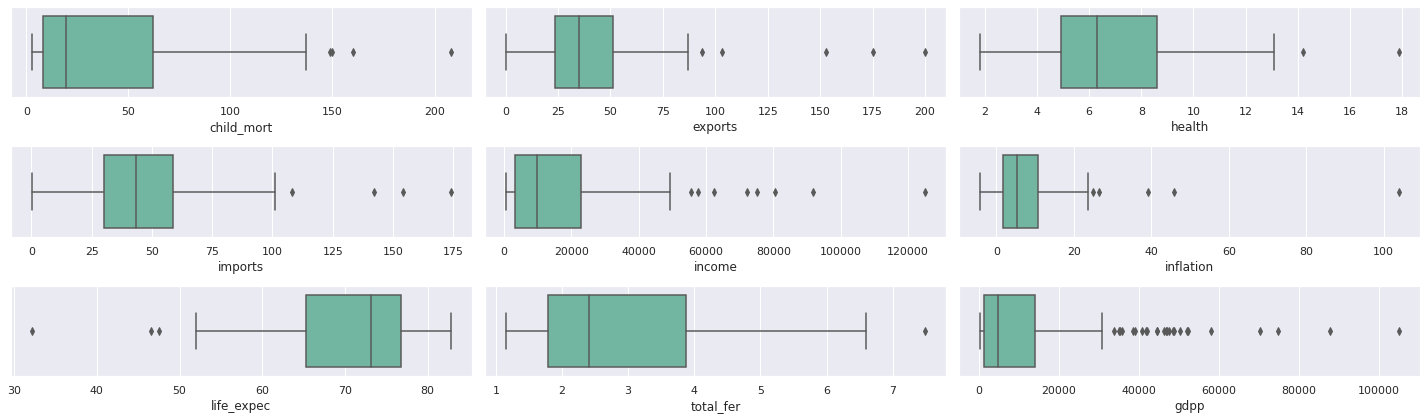

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(3,3,1)
sns.boxplot(country_data.child_mort,palette="Set2")
plt.subplot(3,3,2)
sns.boxplot(country_data.exports,palette="Set2")
plt.subplot(3,3,3)
sns.boxplot(country_data.health,palette="Set2")
plt.subplot(3,3,4)
sns.boxplot(country_data.imports,palette="Set2")
plt.subplot(3,3,5)
sns.boxplot(country_data.income,palette="Set2")
plt.subplot(3,3,6)
sns.boxplot(country_data.inflation,palette="Set2")
plt.subplot(3,3,7)
sns.boxplot(country_data.life_expec,palette="Set2")
plt.subplot(3,3,8)
sns.boxplot(country_data.total_fer,palette="Set2")
plt.subplot(3,3,9)
sns.boxplot(country_data.gdpp,palette="Set2")
plt.tight_layout()

We can observe that **child_mort**, **exports**, **income**, **inflation**, **gdpp** have high outliers. Although we are not going to handle the outlier as it might impact the results.

In [ ]:
country_data.set_index('country',inplace = True)

## **4.Data Visualation**


###**Pairplot**

<Figure size 1800x1800 with 0 Axes>

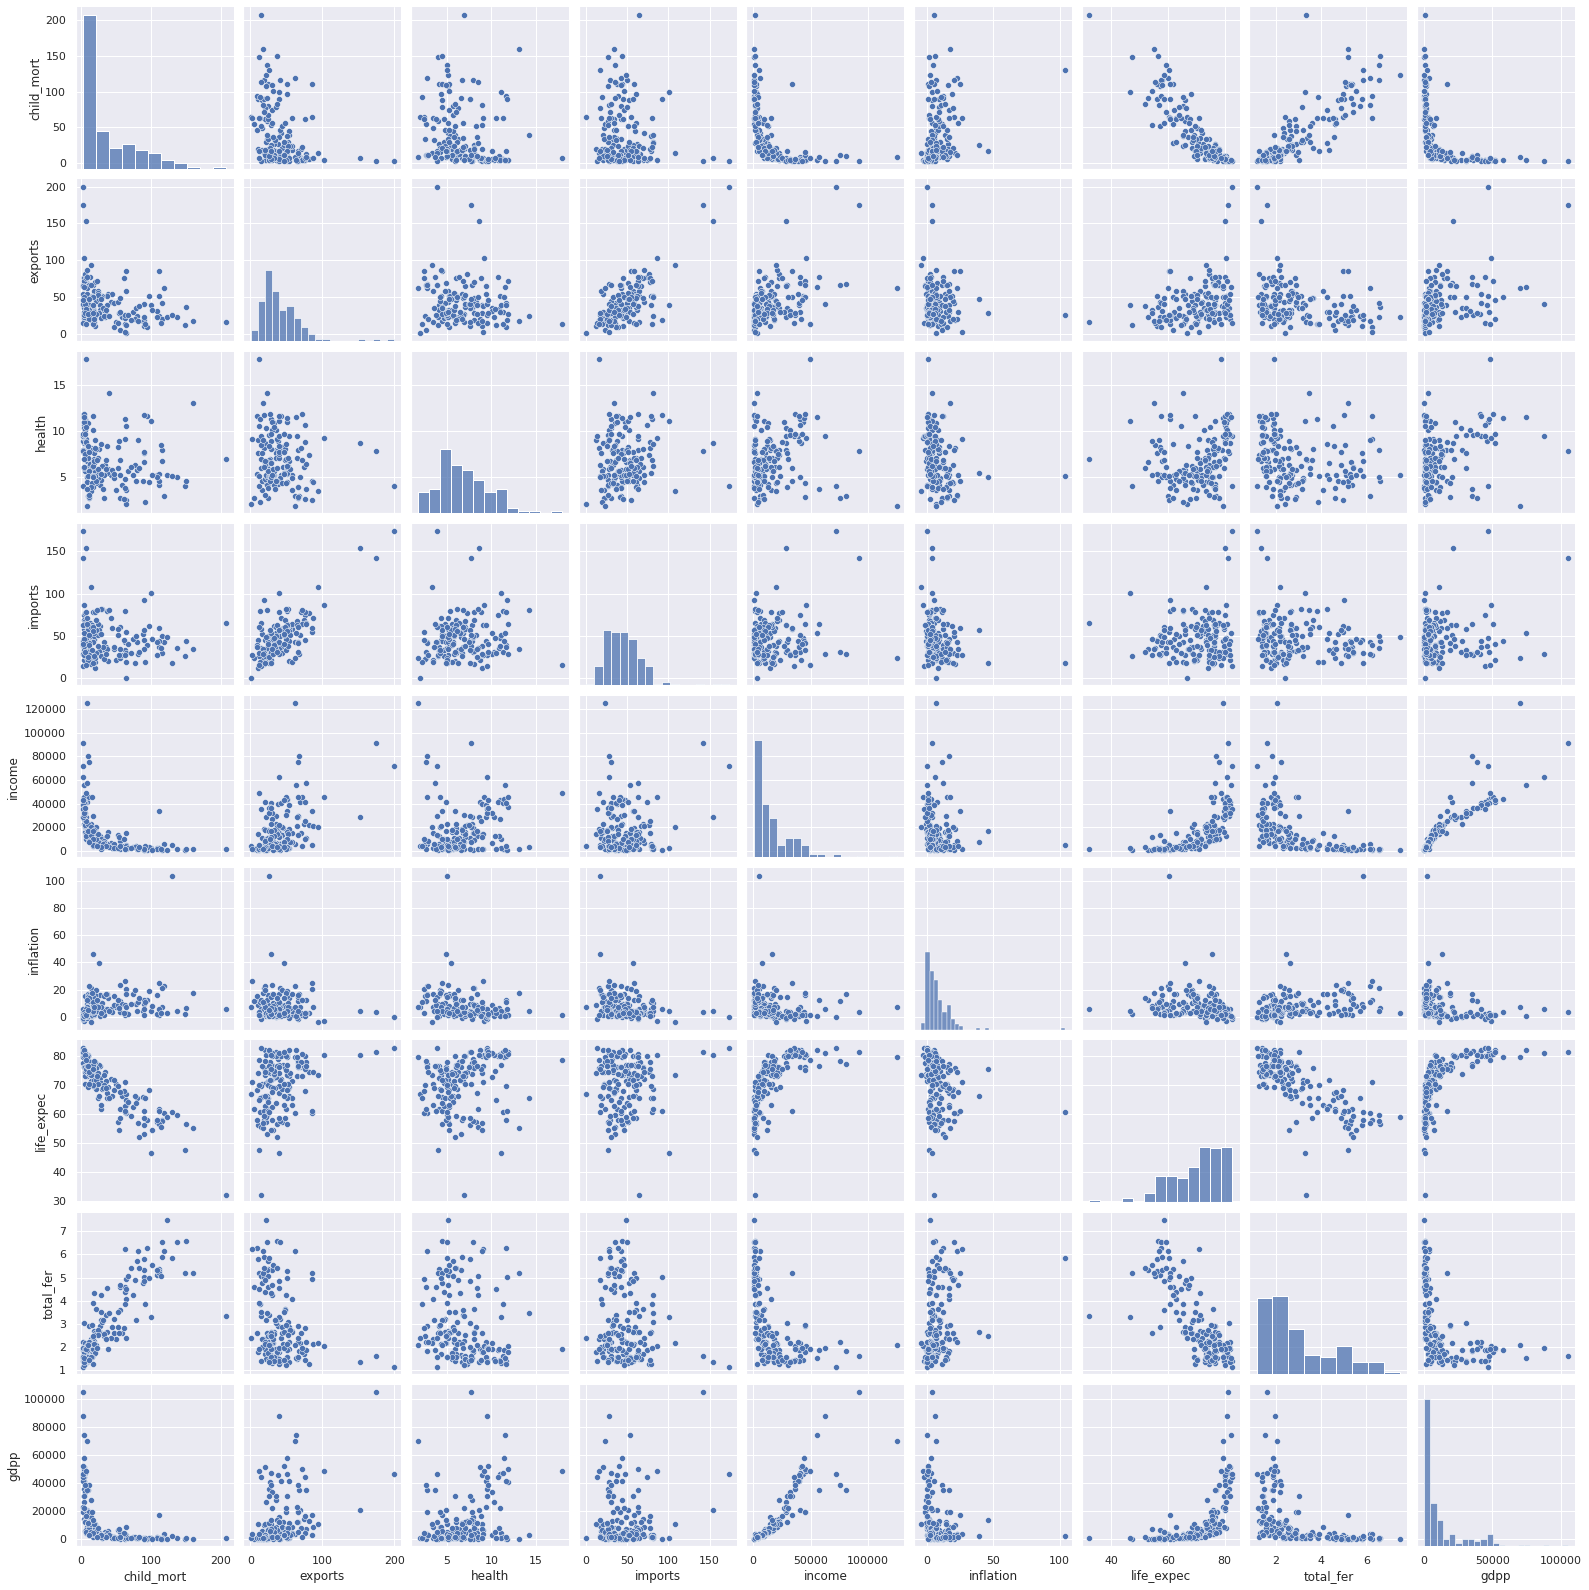

In [ ]:
plt.figure(figsize = (25,25))
sns.pairplot(country_data)
plt.show()

###**Heatmap-**Check Correlation

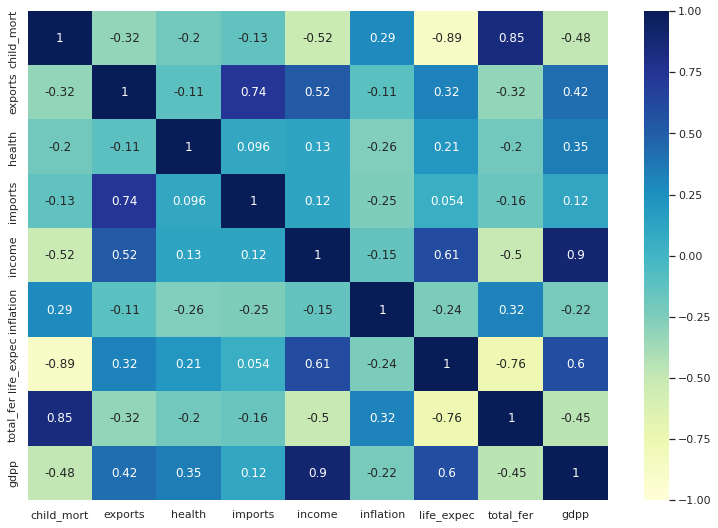

In [ ]:
plt.figure(figsize = (13,9))  
sns.heatmap(country_data.corr(),annot = True,cmap="YlGnBu",vmin=-1,vmax=1)
plt.show()

We can observe some high correlation between features:
 - `total_fer` and `child_mort`
 - `gdpp` and `income`
 - `imports` and `exports`

## **5.Data Prepration**


###**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
country_scaler = scaler.fit_transform(country_data)

In [ ]:
country_scaler = pd.DataFrame(country_scaler)
country_scaler.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_scaler.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## **6.Hopkin's Statistics Test**


Before we apply any clustering algorithm to the given data, it's important to check whether the given data has some meaningful clusters or not? which in general means the given data is not random. The process to evaluate the data to check if the data is feasible for clustering or not is know as the clustering tendency. To check cluster tendency, we use Hopkins test. Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
hopkins(country_scaler)

0.8308364109293263

Since it's Hopkins Statistics score is greater then `0.7`, Hence dataset will form good clusters

##**7.Model Building**

K- means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

### Importing **K-Means** Library 

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(country_scaler)
    distortions.append(kmeanModel.inertia_)

###**Elbow Curve to get the right number of Clusters**

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

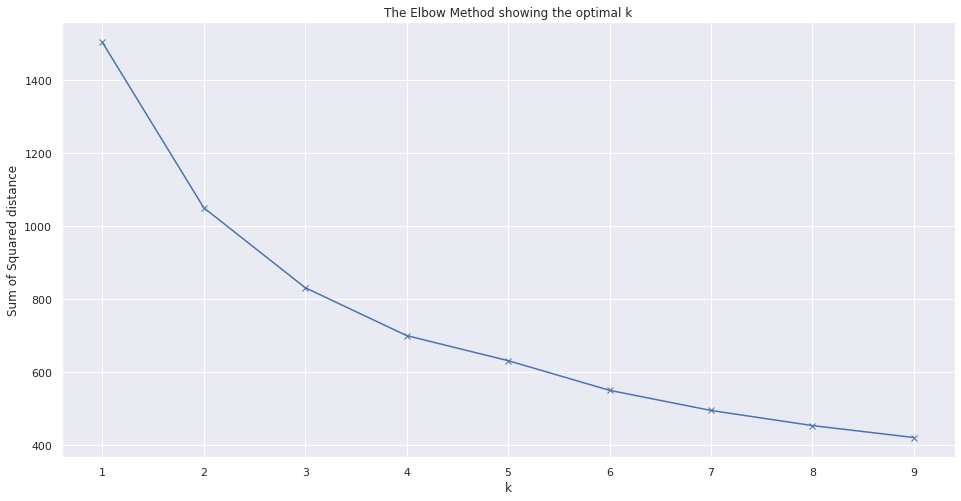

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that by looking elbow method, we see in elbow the range is between 3 to 6, so we will go with value of k as 4.

**K-Means Clustering with K= 4**

In [ ]:
cluster_km = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
cluster_km.fit(country_scaler)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [ ]:
df_km1 = country_scaler
df_km1.index = pd.RangeIndex(len(df_km1.index))
countries_clust_km = pd.concat([df_km1, pd.Series(cluster_km.labels_)], axis=1)
countries_clust_km.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp','ClusterID']
countries_clust_km.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,2
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,2
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,2
5,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791,2
6,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233,2
7,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699,0
8,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082,0
9,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857,2


In [ ]:
countries_clust_km['ClusterID'].value_counts()

2    88
1    46
0    30
3     3
Name: ClusterID, dtype: int64

In [ ]:
df_cluster = pd.concat([country_data.reset_index(),countries_clust_km['ClusterID']],axis=1)

In [ ]:
df_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


Inferences

From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. We have also cross checked with Principal components and found that these variables have good score in PCA. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

**Scatterplot**

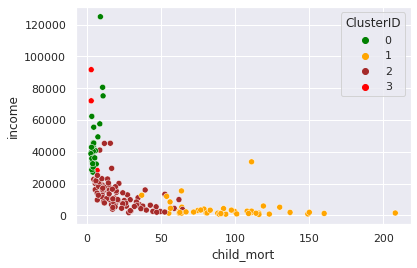

In [ ]:
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=df_cluster,palette=['green','orange','brown','red'])
plt.show()



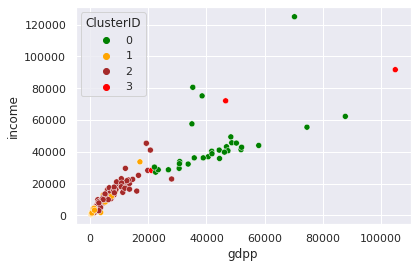

In [ ]:
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',data=df_cluster,palette=['green','orange','brown','red'])
plt.show()

**Boxplot**

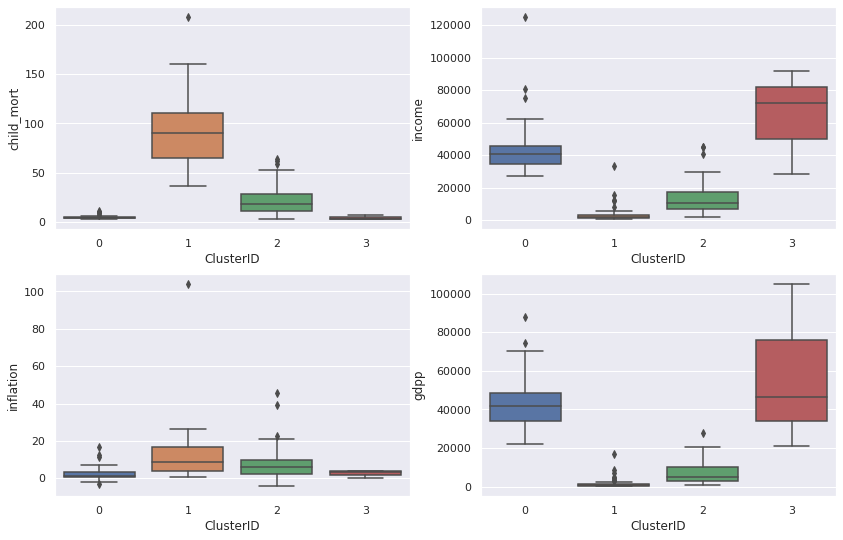

In [ ]:
# Box plot on Original attributes to visualize the spread of the data
fig, axes = plt.subplots(2,2, figsize=(14,9))

sns.boxplot(x = 'ClusterID', y = 'child_mort', data = df_cluster,ax=axes[0][0])
sns.boxplot(x = 'ClusterID', y = 'income', data = df_cluster,ax=axes[0][1])
sns.boxplot(x = 'ClusterID', y = 'inflation', data=df_cluster,ax=axes[1][0])
sns.boxplot(x = 'ClusterID', y = 'gdpp', data=df_cluster,ax=axes[1][1])
plt.show()

### **List of countries lies in which clusters**

In [ ]:
df_cluster[df_cluster['ClusterID']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,0
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,0


In [ ]:
df_cluster[df_cluster['ClusterID']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1


In [ ]:
df_cluster[df_cluster['ClusterID']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,2
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,2
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2


In [ ]:
df_cluster[df_cluster['ClusterID']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3


##**8.Final Analysis**

In [ ]:
child_mort_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).child_mort.mean())
exports_mean= 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).exports.mean())
health_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).health.mean())
imports_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).imports.mean())
income_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).income.mean())
inflat_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).inflation.mean())
life_expec_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean = 	pd.DataFrame(df_cluster.groupby(["ClusterID"]).gdpp.mean())

In [ ]:
df_cluster_analysis = pd.concat([pd.Series([0,1,2,3]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

In [ ]:
df_cluster_analysis.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_cluster_analysis

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
1,1,93.841304,28.837174,6.346957,42.128261,3738.978261,12.087065,59.232609,5.054348,1826.130435
2,2,21.743182,41.316920,6.259318,48.075749,12972.386364,7.430580,72.755682,2.293295,6912.636364
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


###**Final Country list Preparation**

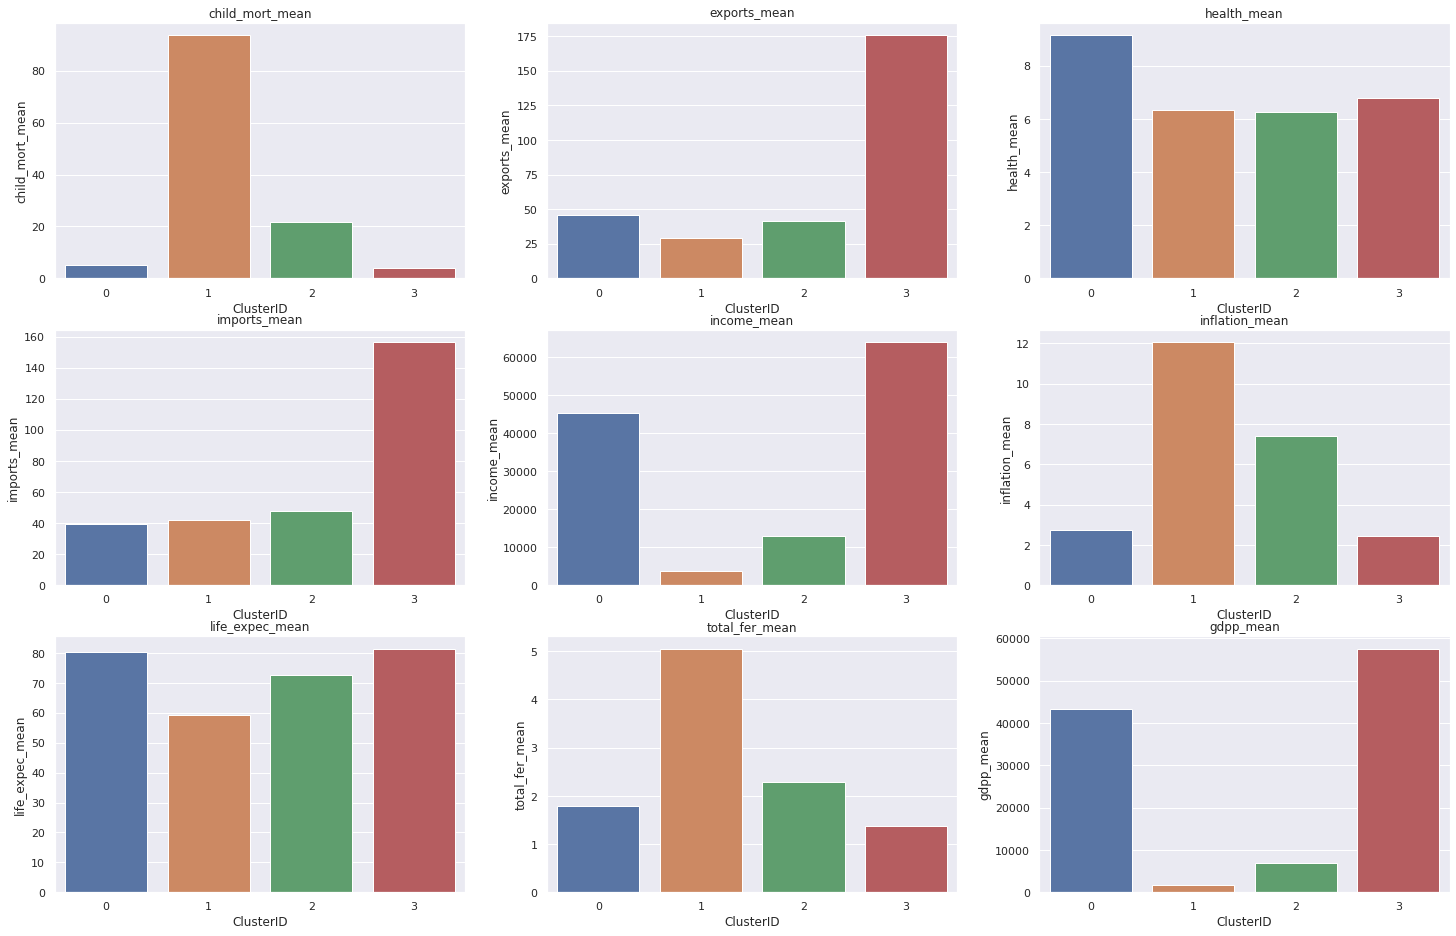

In [ ]:
plt.figure(figsize = (25,16))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(df_cluster_analysis.ClusterID, df_cluster_analysis.gdpp_mean)

plt.show()

By observing `Cluster 1` will be our concern.
- High child mortality rate
- Low income
- Low GDP
- High total fertility
- Low life expentancy
 

In [ ]:
cluster_km=df_cluster[df_cluster['ClusterID']==1]
cluster_km.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,1


### **Final Country list :**

The country which need helping hand are below:

    1. Burundi
    2. Liberia
    3. Congo, Dem. Rep
    4. Niger
    5. Sierra Leone
    6. Madagascar
    7. Mozambique
    8. Central African Republic
    9. Malawi
    10.Eritrea
